# "HUMAN LEARNING" WITH IRIS DATA

Can you predict the species of an iris using petal and sepal measurements?

### OUTLINE:
1. Read the iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and plotting to look for differences between species.
4. Write down a set of rules that could be used to predict species based on measurements.
5. Define a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## PART 1: READ DATA

In [3]:
# read the iris data into a pandas DataFrame, including column names
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                   header=None, names=col_names)

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## PART 2: GATHER BASIC INFORMATION

In [5]:
iris.shape

(150, 5)

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
iris.species.value_counts(normalize=True)

species
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64

In [9]:
iris.index

RangeIndex(start=0, stop=150, step=1)

In [10]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [11]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## PART 3: GROUPBY

In [13]:
# use groupby to look for differences between the species
iris.groupby('species').sepal_length.mean()

species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepal_length, dtype: float64

In [14]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [19]:
iris.groupby('species').describe().T

species             Iris-setosa  Iris-versicolor  Iris-virginica
sepal_length count    50.000000        50.000000       50.000000
             mean      5.006000         5.936000        6.588000
             std       0.352490         0.516171        0.635880
             min       4.300000         4.900000        4.900000
             25%       4.800000         5.600000        6.225000
             50%       5.000000         5.900000        6.500000
             75%       5.200000         6.300000        6.900000
             max       5.800000         7.000000        7.900000
sepal_width  count    50.000000        50.000000       50.000000
             mean      3.418000         2.770000        2.974000
             std       0.381024         0.313798        0.322497
             min       2.300000         2.000000        2.200000
             25%       3.125000         2.525000        2.800000
             50%       3.400000         2.800000        3.000000
             75%       3.675000         3.000000        3.175000
             max       4.400000         3.400000        3.800000
petal_length count    50.000000        50.000000       50.000000
             mean      1.464000         4.260000        5.552000
             std       0.173511         0.469911        0.551895
             min       1.000000         3.000000        4.500000
             25%       1.400000         4.000000        5.100000
             50%       1.500000         4.350000        5.550000
             75%       1.575000         4.600000        5.875000
             max       1.900000         5.100000        6.900000
petal_width  count    50.000000        50.000000       50.000000
             mean      0.244000         1.326000        2.026000
             std       0.107210         0.197753        0.274650
             min       0.100000         1.000000        1.400000
             25%       0.200000         1.200000        1.800000
             50%       0.200000         1.300000        2.000000
             75%       0.300000         1.500000        2.300000
             max       0.600000         1.800000        2.500000

In [20]:
# use sorting to look for differences between the species
iris.sort_values('sepal_length').values

array([[4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [4.4, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.4, 3.0, 1.3, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.5, 2.3, 1.3, 0.3, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [4.6, 3.2, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.3, 'Iris-setosa'],
       [4.8, 3.4, 1.9, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.1, 1.6, 0.2, 'Iris-setosa'],
       [4.9, 2.4, 3.3, 1.0, 'Iris-versicolor'],
       [4.9, 2.5, 4.5, 1.7, 'Iris-virginica'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [5.0, 3.5, 1.3, 0.

In [17]:
iris.sort_values(by=['sepal_length']).values

array([[4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [4.4, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.4, 3.0, 1.3, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.5, 2.3, 1.3, 0.3, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [4.6, 3.2, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.3, 'Iris-setosa'],
       [4.8, 3.4, 1.9, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.1, 1.6, 0.2, 'Iris-setosa'],
       [4.9, 2.4, 3.3, 1.0, 'Iris-versicolor'],
       [4.9, 2.5, 4.5, 1.7, 'Iris-virginica'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [5.0, 3.5, 1.3, 0.

In [18]:
iris.sort_values('sepal_width').values

array([[5.0, 2.0, 3.5, 1.0, 'Iris-versicolor'],
       [6.0, 2.2, 4.0, 1.0, 'Iris-versicolor'],
       [6.0, 2.2, 5.0, 1.5, 'Iris-virginica'],
       [6.2, 2.2, 4.5, 1.5, 'Iris-versicolor'],
       [4.5, 2.3, 1.3, 0.3, 'Iris-setosa'],
       [5.5, 2.3, 4.0, 1.3, 'Iris-versicolor'],
       [5.0, 2.3, 3.3, 1.0, 'Iris-versicolor'],
       [6.3, 2.3, 4.4, 1.3, 'Iris-versicolor'],
       [5.5, 2.4, 3.7, 1.0, 'Iris-versicolor'],
       [5.5, 2.4, 3.8, 1.1, 'Iris-versicolor'],
       [4.9, 2.4, 3.3, 1.0, 'Iris-versicolor'],
       [6.3, 2.5, 4.9, 1.5, 'Iris-versicolor'],
       [6.3, 2.5, 5.0, 1.9, 'Iris-virginica'],
       [5.1, 2.5, 3.0, 1.1, 'Iris-versicolor'],
       [5.7, 2.5, 5.0, 2.0, 'Iris-virginica'],
       [6.7, 2.5, 5.8, 1.8, 'Iris-virginica'],
       [5.6, 2.5, 3.9, 1.1, 'Iris-versicolor'],
       [5.5, 2.5, 4.0, 1.3, 'Iris-versicolor'],
       [4.9, 2.5, 4.5, 1.7, 'Iris-virginica'],
       [5.8, 2.6, 4.0, 1.2, 'Iris-versicolor'],
       [5.7, 2.6, 3.5, 1.0, 'Iris-versicolor'],
 

In [21]:
iris.sort_values('petal_length').values

array([[4.6, 3.6, 1.0, 0.2, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.0, 3.2, 1.2, 0.2, 'Iris-setosa'],
       [5.5, 3.5, 1.3, 0.2, 'Iris-setosa'],
       [5.0, 3.5, 1.3, 0.3, 'Iris-setosa'],
       [4.4, 3.0, 1.3, 0.2, 'Iris-setosa'],
       [4.4, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.5, 2.3, 1.3, 0.3, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.3, 'Iris-setosa'],
       [5.5, 4.2, 1.4, 0.2, 'Iris-setosa'],
       [5.2, 3.4, 1.4, 0.2, 'Iris-setosa'],
       [4.6, 3.2, 1.4, 0.2, 'Iris-setosa'],
       [5.0, 3.3, 1.4, 0.2, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iri

In [22]:
iris.sort_values('petal_width').values

array([[5.2, 4.1, 1.5, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [5.2, 3.5, 1.5, 0.2, 'Iris-setosa'],
       [5.2, 3.4, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.1, 1.6, 0.2, 'Iris-setosa'],
       [5.5, 4.2, 1.4, 0.2, 'Iris-setosa'],
       [5.5, 3.5, 1.3, 0.2, 'Iris-setosa'],
       [4.4, 3.0, 1.3, 0.2, 'Iris-setosa'],
       [5.1, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [5.1, 3.8, 1.6, 0.2, 'Iris-setosa'],
       [4.6, 3.2, 1.4, 0.2, 'Iris-setosa'],
       [5.3, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.3, 1.4, 0.2, 'Iris-setosa'],
       [5.0, 3.0, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.9, 0.2, 'Iris-setosa'],
       [5.0, 3.2, 1.2, 0.2, 'Iri

In [23]:
plt.style.use("fivethirtyeight")

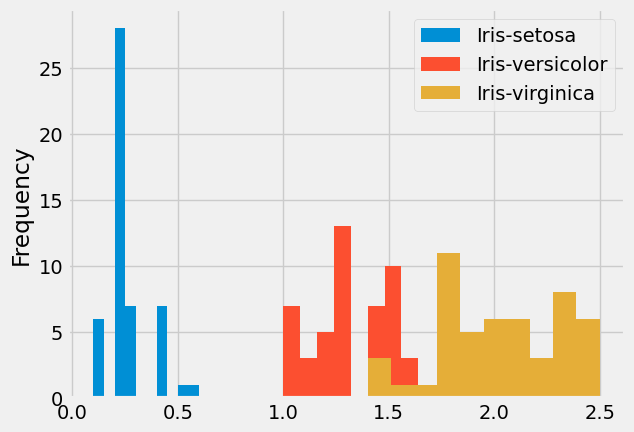

In [24]:
iris.groupby('species')['petal_width'].plot(kind='hist', legend=True);

array([[<Axes: title={'center': 'Iris-setosa'}>,
        <Axes: title={'center': 'Iris-versicolor'}>],
       [<Axes: title={'center': 'Iris-virginica'}>, <Axes: >]],
      dtype=object)

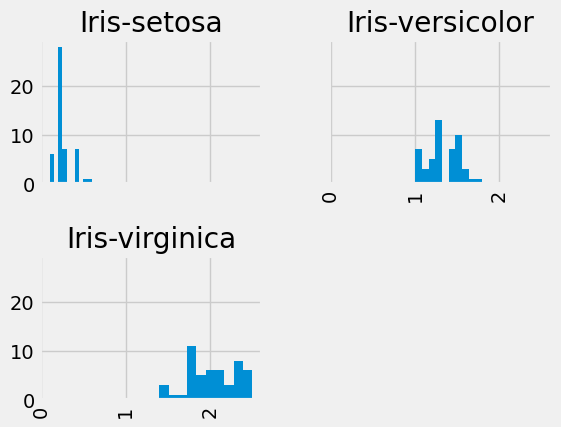

In [25]:
# use plotting to look for differences between the species
iris.petal_width.hist(by=iris.species, sharex=True, sharey=True)

<Axes: title={'center': 'petal_width'}, xlabel='species'>

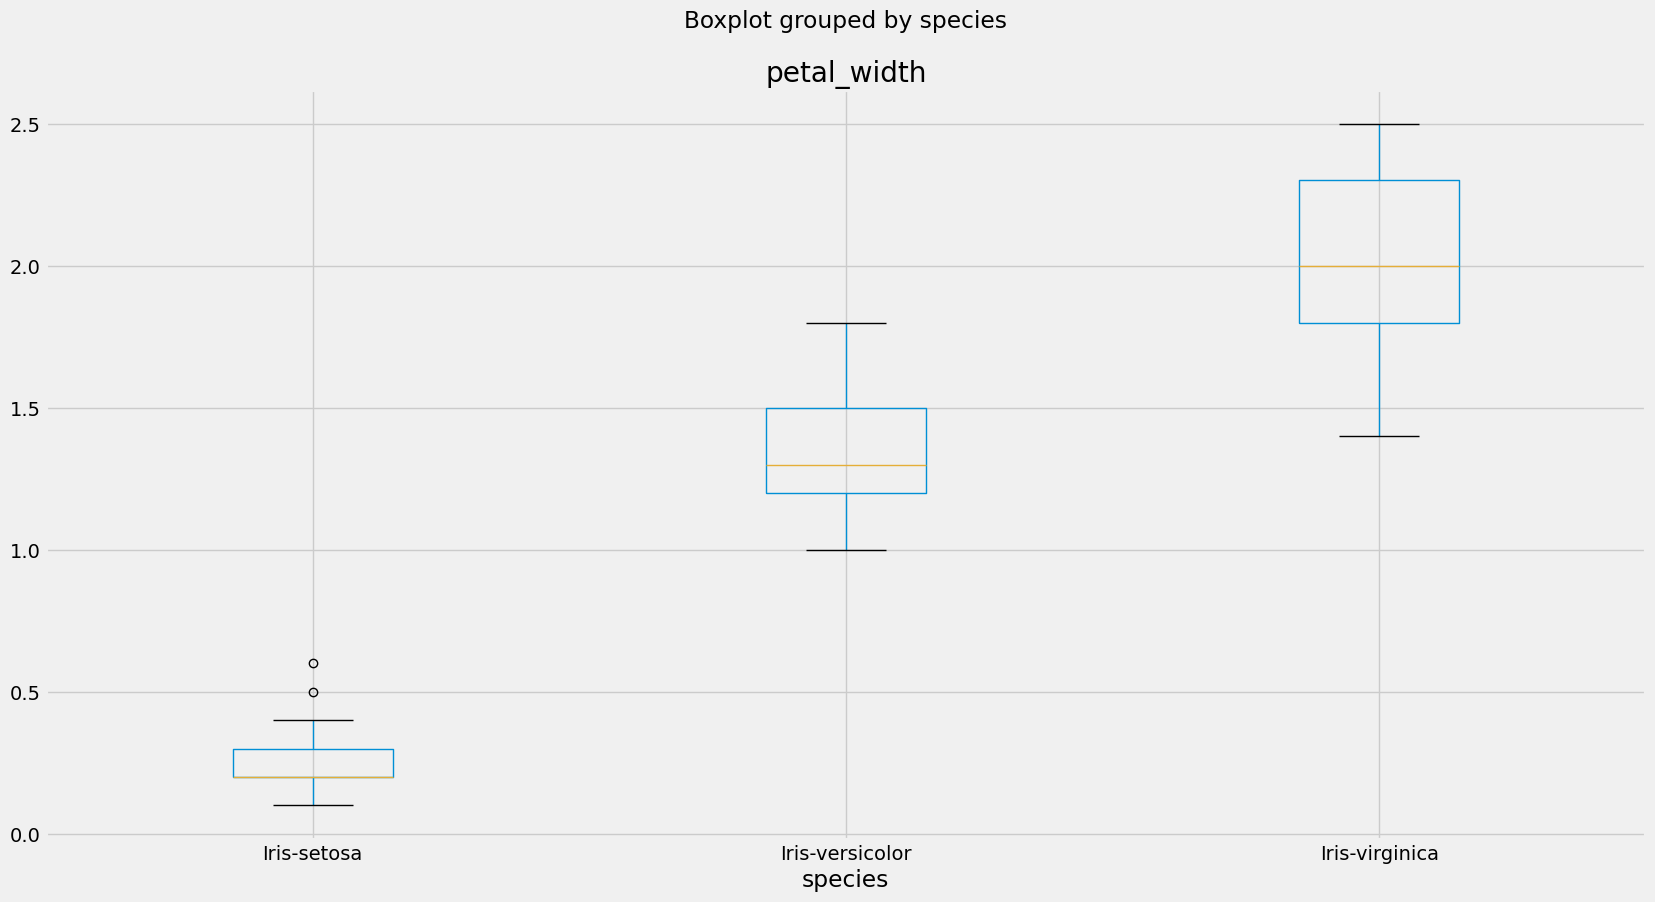

In [26]:
iris.boxplot(column='petal_width', by='species', figsize=(20,10))

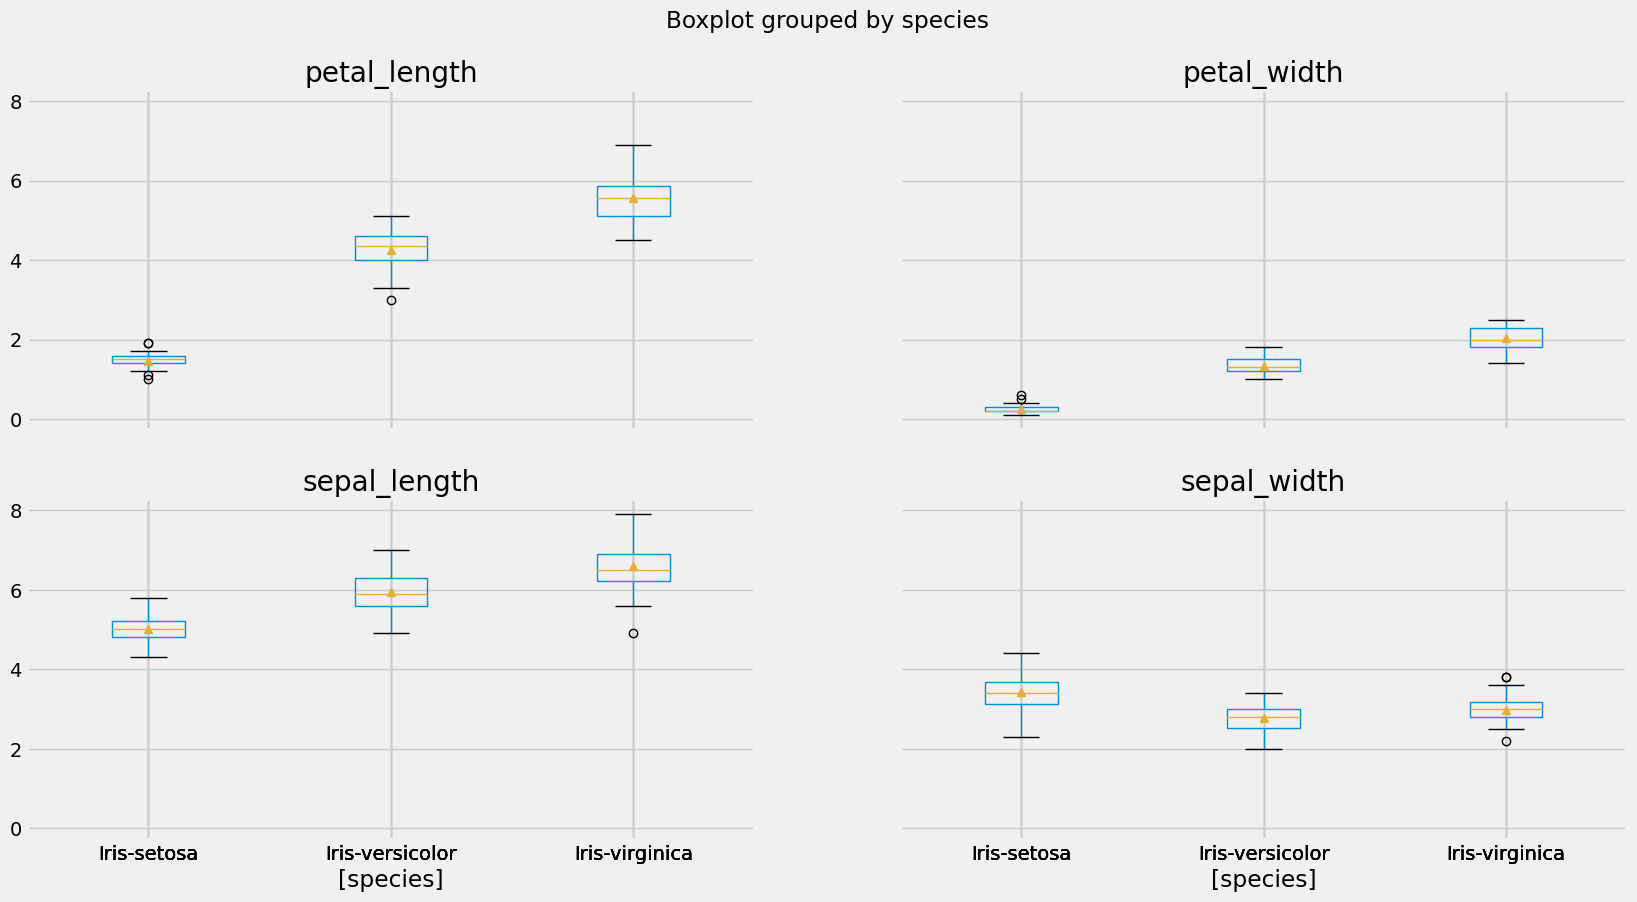

In [27]:
iris.boxplot(by='species', showmeans=True, figsize=(20,10));

In [28]:
# map species to a numeric value so that plots can be colored by category
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [31]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


<Axes: xlabel='petal_length', ylabel='petal_width'>

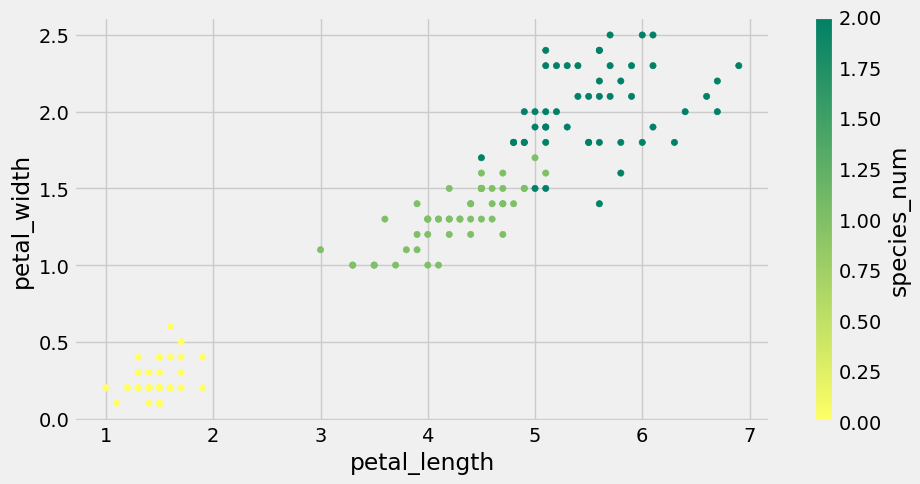

In [29]:
import matplotlib.pyplot as plt
#cm = 'Reds'
cm = plt.cm.summer_r
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cm, figsize=(10,5))

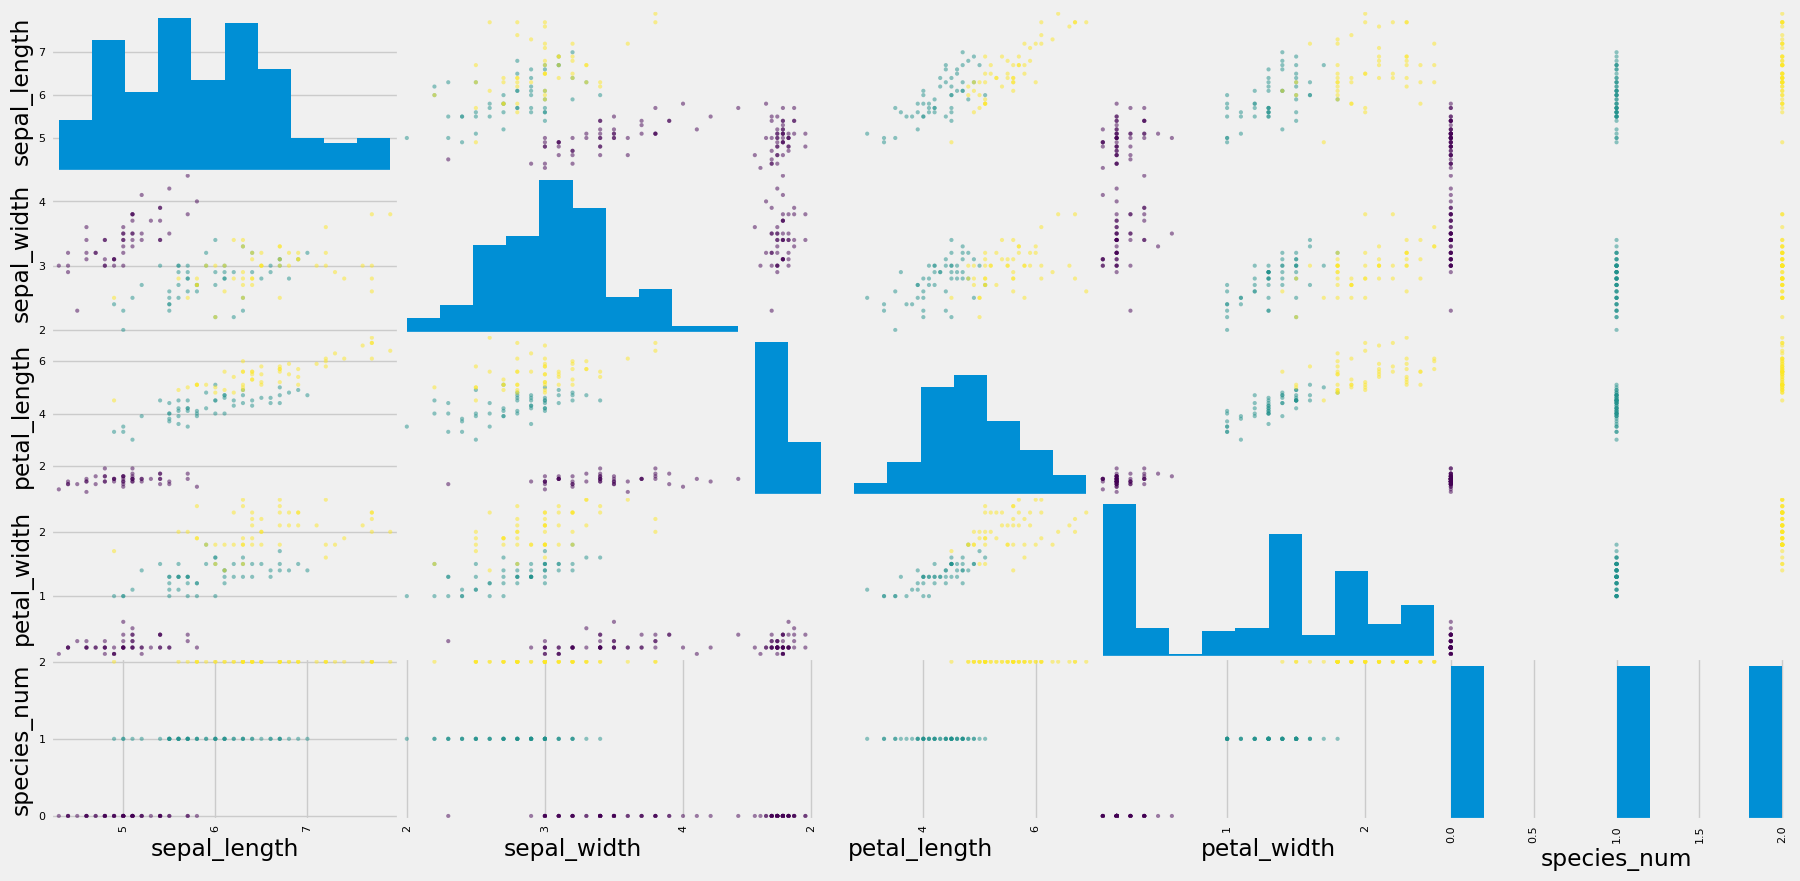

In [30]:
pd.plotting.scatter_matrix(iris, c=iris.species_num, figsize=(20,10));

## PART 4: CUSTOM FUNCTION

~~~
If petal length is less than 3, predict setosa.
Else if petal width is less than 1.8, predict versicolor.
Otherwise predict virginica.
~~~

In [32]:
PETAL_LENGTH_Index = 2

# define a function that accepts a row of data and returns a predicted species
def classify_iris(row):
    if row[PETAL_LENGTH] < 3:          # petal_length
        return 0    # setosa
    elif row[3] < 1.8:      # petal_width
        return 1    # versicolor
    else:
        return 2    # virginica

In [33]:
# predict for a single row to test the function
classify_iris(iris.iloc[0, :])      # first row

0

In [34]:
classify_iris(iris.iloc[149, :])    # last row

2

In [35]:
# store predictions for all rows
predictions = [classify_iris(row) for row in iris.values]

In [36]:
predictions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [37]:
# calculate the percentage of correct predictions
import numpy as np
np.mean(iris.species_num == predictions)    # 0.96

0.96